In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
data = pd.read_csv('heart.data.csv')

In [ ]:
data.head()

,Unnamed: 0,biking,smoking,heart.disease
0,1,30.801246,10.896608,11.769423
1,2,65.129215,2.219563,2.854081
2,3,1.959665,17.588331,17.177803
3,4,44.800196,2.802559,6.816647
4,5,69.428454,15.974505,4.062224


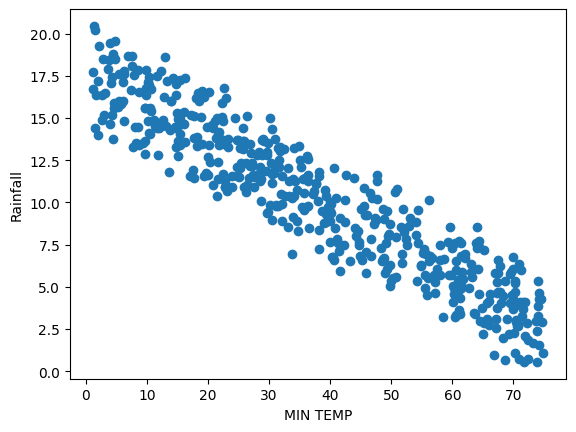

In [ ]:
x = data['biking']
y = data['heart.disease']
plt.scatter(x, y)
plt.xlabel('MIN TEMP')
plt.ylabel('Rainfall')
plt.show()


In [ ]:

x = np.array(x)
y = np.array(y)

b1, b0 = np.polyfit(x, y, 1)

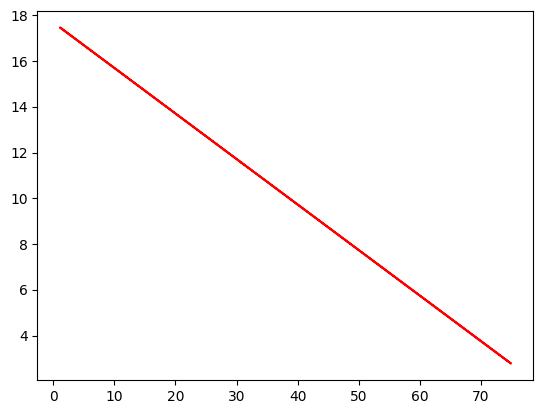

In [ ]:

plt.plot(x, b1*x + b0, color='red')
plt.show()

In [ ]:
x = data[['biking', 'smoking']].values.reshape(-1,2)
y = data['heart.disease']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [ ]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [ ]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  14.924263733461345
Coefficients:


[(array([30.80124571, 10.89660802]), -0.200070681225094),
 (array([65.12921517,  2.21956318]), 0.1795190360256091)]

In [ ]:
y_pred_mlr= mlr.predict(x_test)
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [13.16201288  2.70782209 12.37597752 10.10785259 15.01793211 17.03237207
  6.13166829  9.28344681  9.74076159  8.93025615  4.09211679 12.09825498
  6.70642886 15.96028868 11.44221934 13.3283374   8.05072979  6.10882218
  3.07799169  5.15410404  9.49241671 12.53556811  6.25567787 11.12107119
 13.30854757 14.59382054 10.94227267  9.0862171  10.17941815 14.75355737
  8.10389125 10.89965455  1.19755424  6.46417075  5.59842126 17.75749486
  8.66625001 13.35464968  6.73615829  7.76810086 11.20512392  4.02673866
  9.46116938  7.77711619  2.31459126  2.93704345  0.96007723 10.23871343
 16.05072283  6.18097946 12.9579814   4.77149085  5.04160321 12.60577624
  8.64967159  3.80528841 17.34348414 14.66625949 12.73167258 12.74567039
 10.48056745  3.34627208 15.497745   17.62156385  4.85826626 15.93578039
 11.24326335  5.21436431 17.6897421  14.86018254 10.70132224 17.28714802
 10.88741433  6.26455022 10.47006639 14.35515     0.75416222 15.45771915
  5.69571156 11.88699709  

In [ ]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
103,14.391448,13.162013
136,2.989068,2.707822
140,12.921673,12.375978
459,9.793240,10.107853
353,15.162775,15.017932


In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_mlr)
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('r2 socre is ',score)
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

r2 socre is  0.975341220566481
R squared: 97.95
Mean Absolute Error: 0.5767164927411846
Mean Square Error: 0.5442304664706222
Root Mean Square Error: 0.737719775030209


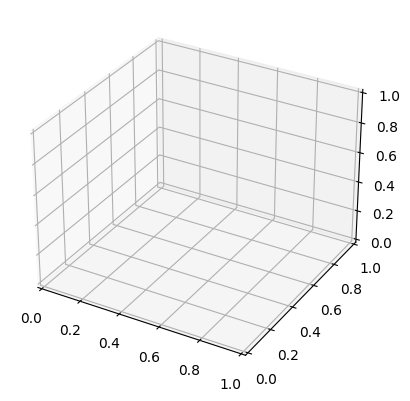

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

In [ ]:
x1 = x[:, 0]
y1 = x[:, 1]
z = y

In [ ]:
x_pred = np.linspace(6, 24, 30)
y_pred = np.linspace(0, 100, 30)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

In [ ]:
from sklearn import linear_model
ols = linear_model.LinearRegression()
model = ols.fit(x, y)
predicted = model.predict(model_viz)

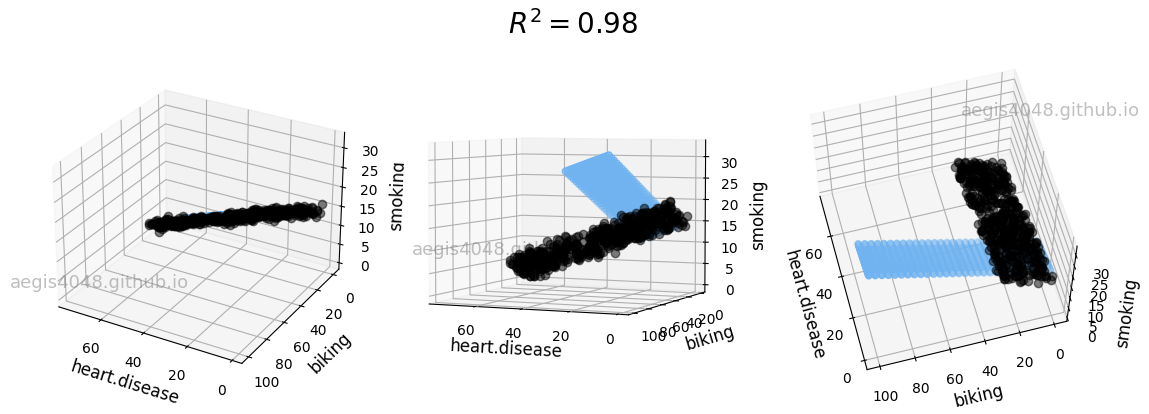

In [ ]:
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x1, y1, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('heart.disease', fontsize=12)
    ax.set_ylabel('biking', fontsize=12)
    ax.set_zlabel('smoking', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % score, fontsize=20)

fig.tight_layout()